In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
pwd

'/md/gilee/cosmos-in-us/Multiverse-utils/notebooks/performance'

In [18]:
def read_outfile(fname, verbose=False):
    
    with open(fname, "r") as file:
        lines = file.readlines()

    step_main = []
    time_main = []
    time_ptcl = []

    for line in lines:
        if "Main step" in line:
            step_main.append(int(line.split()[2]))
            if verbose:
                print(line)
        
        if "Total running time" in line:
            time_main.append(float(line.split()[3]))
            if verbose:
                print(line)
                
        if "mus" in line:
            time_ptcl.append(float(line.split()[8]))
            if verbose:
                print(line)
    
    if step_main[0] == 1:
        step_main = [0] + step_main
    
    min_length = min(len(step_main), len(time_main), len(time_ptcl))
    
    step_main = np.array(step_main)[:min_length]
    time_main = np.array(time_main)[:min_length]
    time_ptcl = np.array(time_ptcl)[:min_length]
    
    return step_main, time_main, time_ptcl

In [19]:
fname1 = "./final-CPL0.o15020838.olaf"
fname2 = "./final-CPL0.o15124479.olaf"

In [20]:
step1, time1, ptime1 = read_outfile(fname1)#, verbose=True)
step2, time2, ptime2 = read_outfile(fname2)#, verbose=True)

In [21]:
step1.shape, time1.shape

((1894,), (1894,))

In [22]:
step1[np.where(step1 == step2[0])]

array([1892])

In [23]:
time1[np.where(step1 == step2[0])]

array([251744.2])

<IPython.core.display.Javascript object>


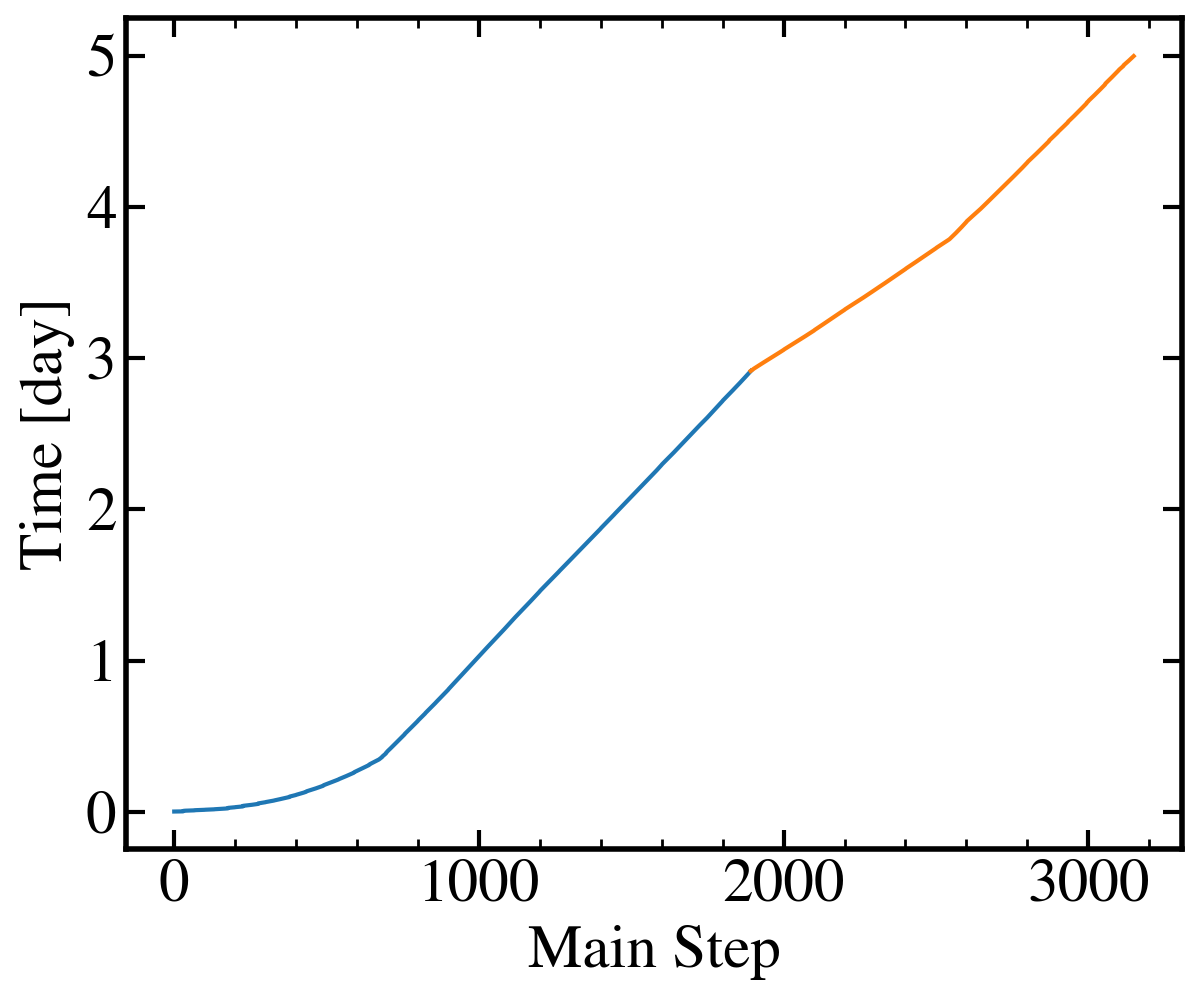

In [24]:
plt.figure(figsize=(6, 5))
plt.plot(step1, time1/3600/24)
plt.plot(step2, time2/3600/24 + time1[np.where(step1 == step2[0])]/3600/24)

plt.xlabel("Main Step")
plt.ylabel("Time [day]")
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


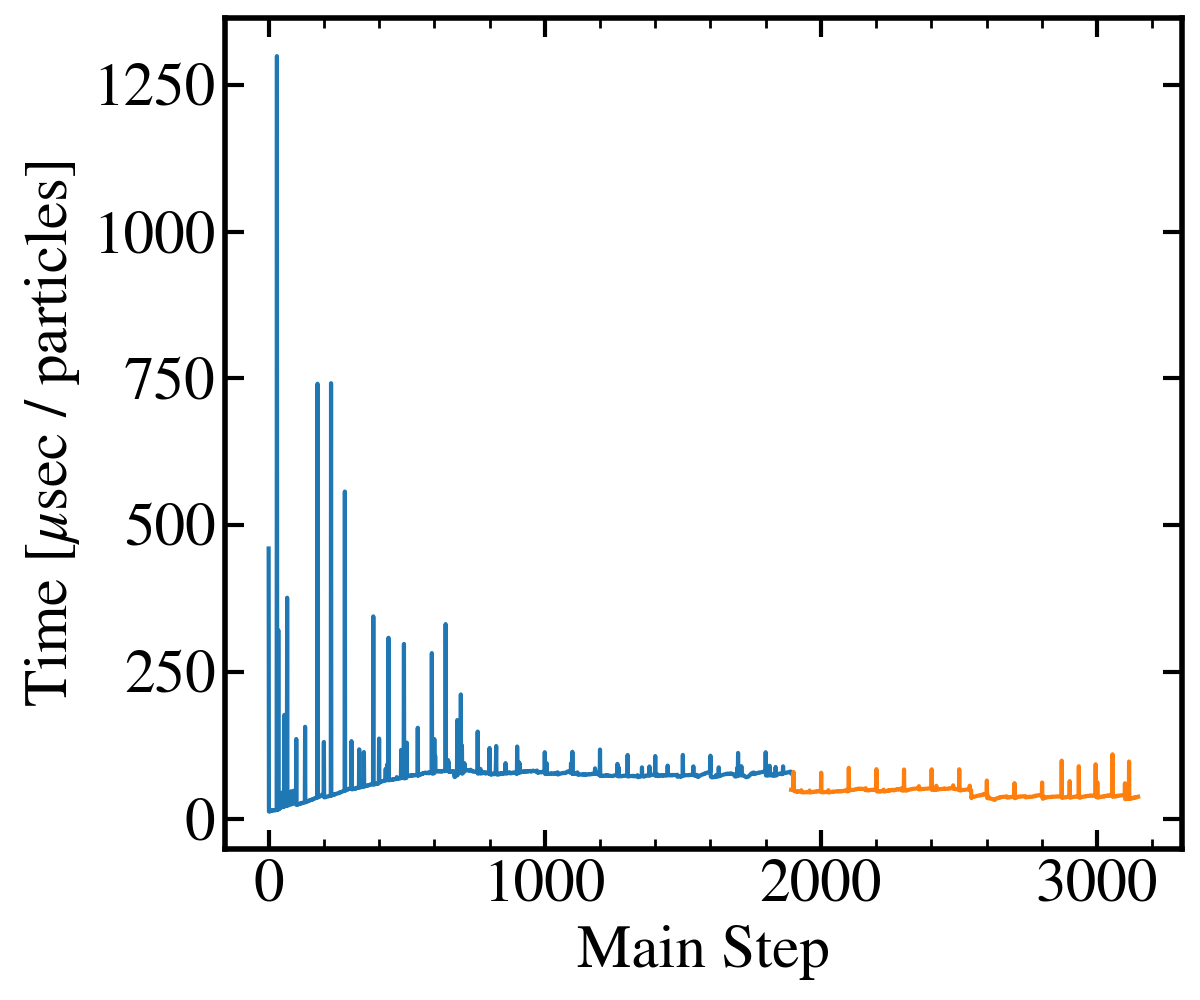

In [25]:
plt.figure(figsize=(6, 5))
plt.plot(step1, ptime1)
plt.plot(step2, ptime2)

plt.xlabel("Main Step")
plt.ylabel(r"Time [$\mu$sec / particles]")
plt.tight_layout(pad=0.3)

In [30]:
!ls -al final-LCDM*

-rw-r--r-- 1 gilee gilee 3551480 Dec 18 13:31 final-LCDM.o15065870.olaf
-rw-r--r-- 1 gilee gilee 2492339 Dec 18 13:31 final-LCDM.o15124476.olaf
-rw-r--r-- 1 gilee gilee 2820751 Dec 18 13:31 final-LCDM.o15126900.olaf


In [53]:
fname1 = "./final-LCDM.o15065870.olaf" # (ntask, nthread) = (600, 2)
fname2 = "./final-LCDM.o15124476.olaf" # (ntask, nthread) = (600, 2)
fname3 = "./final-LCDM.o15126900.olaf" # (ntask, nthread) = (600, 4)
lastsnap_lcdm = 41

lcdm_step1, lcdm_time1, lcdm_ptime1 = read_outfile(fname1)#, verbose=True)
lcdm_step2, lcdm_time2, lcdm_ptime2 = read_outfile(fname2)#, verbose=True)
lcdm_step3, lcdm_time3, lcdm_ptime3 = read_outfile(fname3)#, verbose=True)

In [54]:
!ls -al final-CPL0*

-rw-r--r-- 1 gilee gilee 7582971 Dec 18 13:37 final-CPL0.o15020838.olaf
-rw-r--r-- 1 gilee gilee 7028013 Dec 18 13:37 final-CPL0.o15124479.olaf


In [55]:
fname1 = "./final-CPL0.o15020838.olaf"
fname2 = "./final-CPL0.o15124479.olaf"
lastsnap_cpl0 = 60

cpl0_step1, cpl0_time1, cpl0_ptime1 = read_outfile(fname1)#, verbose=True)
cpl0_step2, cpl0_time2, cpl0_ptime2 = read_outfile(fname2)#, verbose=True)

In [56]:
!ls -al final-CPL1*

-rw-r--r-- 1 gilee gilee 7091433 Dec 18 13:38 final-CPL1.o15020842.olaf
-rw-r--r-- 1 gilee gilee 2719099 Dec 18 13:38 final-CPL1.o15126905.olaf


In [57]:
fname1 = "./final-CPL1.o15020842.olaf"
fname2 = "./final-CPL1.o15126905.olaf"
lastsnap_cpl1 = 46

cpl1_step1, cpl1_time1, cpl1_ptime1 = read_outfile(fname1)#, verbose=True)
cpl1_step2, cpl1_time2, cpl1_ptime2 = read_outfile(fname2)#, verbose=True)

<IPython.core.display.Javascript object>


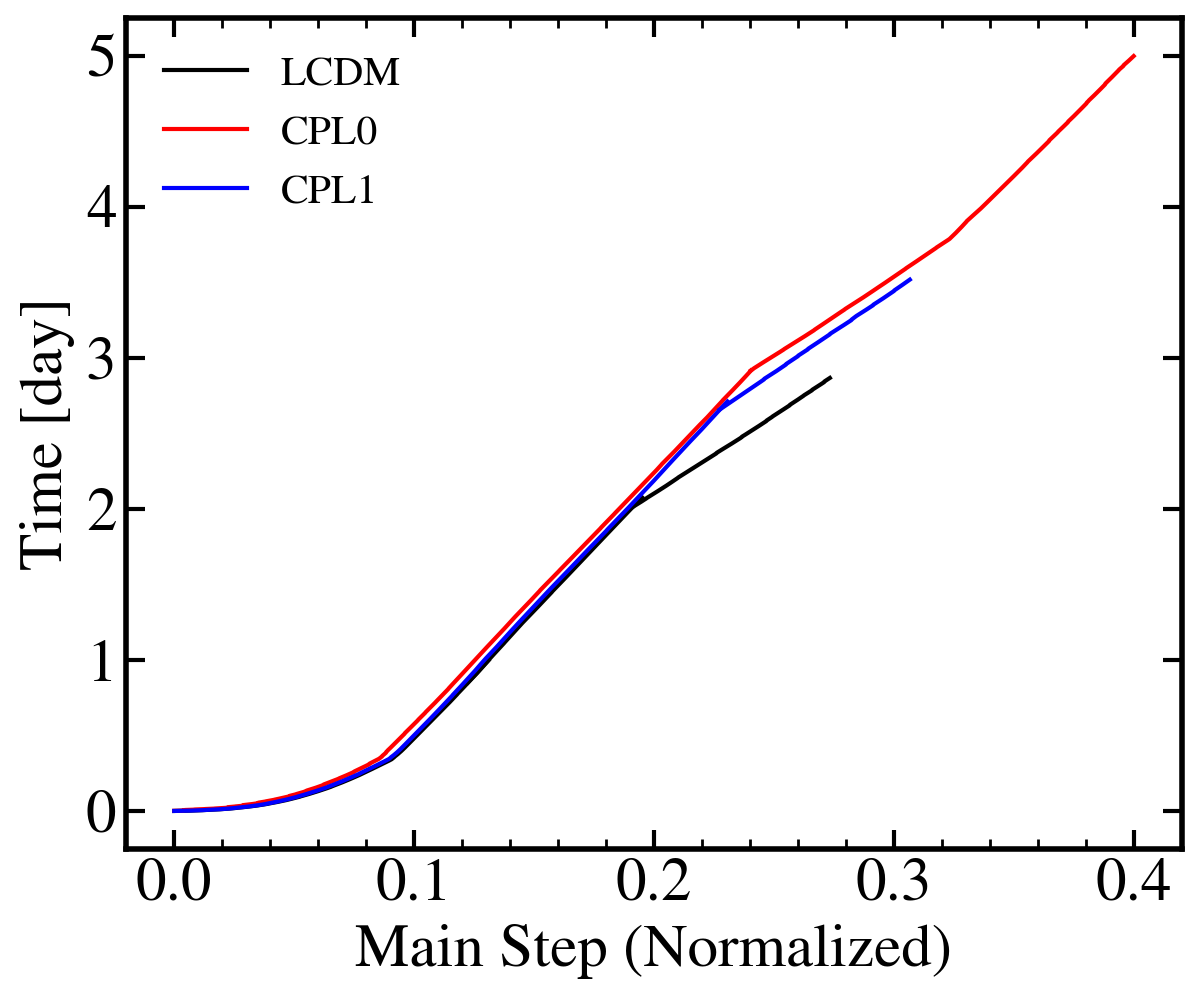

In [94]:
plt.figure(figsize=(6, 5))
plt.plot(lcdm_step1*lastsnap_lcdm/150/lcdm_step3[-1], lcdm_time1/3600/24, c='k', label="LCDM")
plt.plot(lcdm_step2*lastsnap_lcdm/150/lcdm_step3[-1], lcdm_time2/3600/24 + lcdm_time1[np.where(lcdm_step1 == lcdm_step2[0])]/3600/24, c='k')
plt.plot(lcdm_step3*lastsnap_lcdm/150/lcdm_step3[-1], lcdm_time3/3600/24 
         + lcdm_time1[np.where(lcdm_step1 == lcdm_step2[0])]/3600/24
         + lcdm_time2[np.where(lcdm_step2 == lcdm_step3[0])]/3600/24, c='k')

plt.plot(cpl0_step1*lastsnap_cpl0/150/cpl0_step2[-1], cpl0_time1/3600/24, c='r', label="CPL0")
plt.plot(cpl0_step2*lastsnap_cpl0/150/cpl0_step2[-1], cpl0_time2/3600/24 + cpl0_time1[np.where(cpl0_step1 == cpl0_step2[0])]/3600/24, c='r')

plt.plot(cpl1_step1*lastsnap_cpl1/150/cpl1_step2[-1], cpl1_time1/3600/24, c='b', label="CPL1")
plt.plot(cpl1_step2*lastsnap_cpl1/150/cpl1_step2[-1], cpl1_time2/3600/24 + cpl1_time1[np.where(cpl1_step1 == cpl1_step2[0])]/3600/24, c='b')

plt.legend(fontsize=15, frameon=False)
# plt.xlim(0, 1)
# plt.ylim(0, 20)
plt.xlabel("Main Step (Normalized)")
plt.ylabel("Time [day]")
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


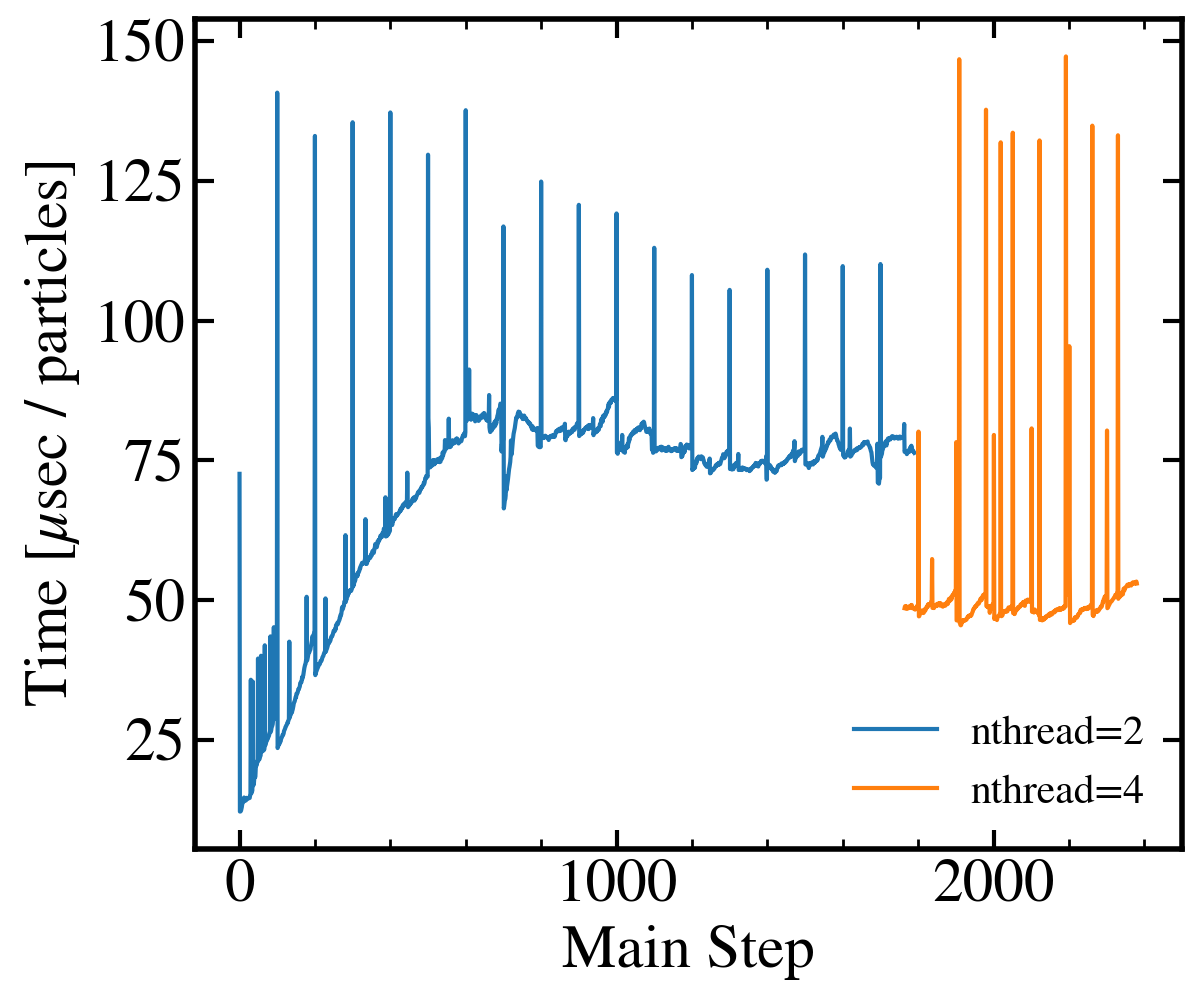

In [102]:
plt.figure(figsize=(6, 5))
# plt.plot(lcdm_step1, lcdm_ptime1)
# plt.plot(lcdm_step2, lcdm_ptime2)
# plt.plot(lcdm_step3, lcdm_ptime3)

# plt.plot(cpl0_step1, cpl0_ptime1)
# plt.plot(cpl0_step2, cpl0_ptime2)

plt.plot(cpl1_step1, cpl1_ptime1, label="nthread=2")
plt.plot(cpl1_step2, cpl1_ptime2, label="nthread=4")


plt.legend(fontsize=15, frameon=False)
plt.xlabel("Main Step")
plt.ylabel(r"Time [$\mu$sec / particles]")
plt.tight_layout(pad=0.3)

In [83]:
fname1 = "./test-LCDM.o244637.grammar"
fname2 = "./test-CPL0.o244639.grammar"
fname3 = "./test-CPL1.o244638.grammar"

In [84]:
step1, time1, ptime1 = read_outfile(fname1)#, verbose=True)
step2, time2, ptime2 = read_outfile(fname2)#, verbose=True)
step3, time3, ptime3 = read_outfile(fname3)#, verbose=True)

<IPython.core.display.Javascript object>


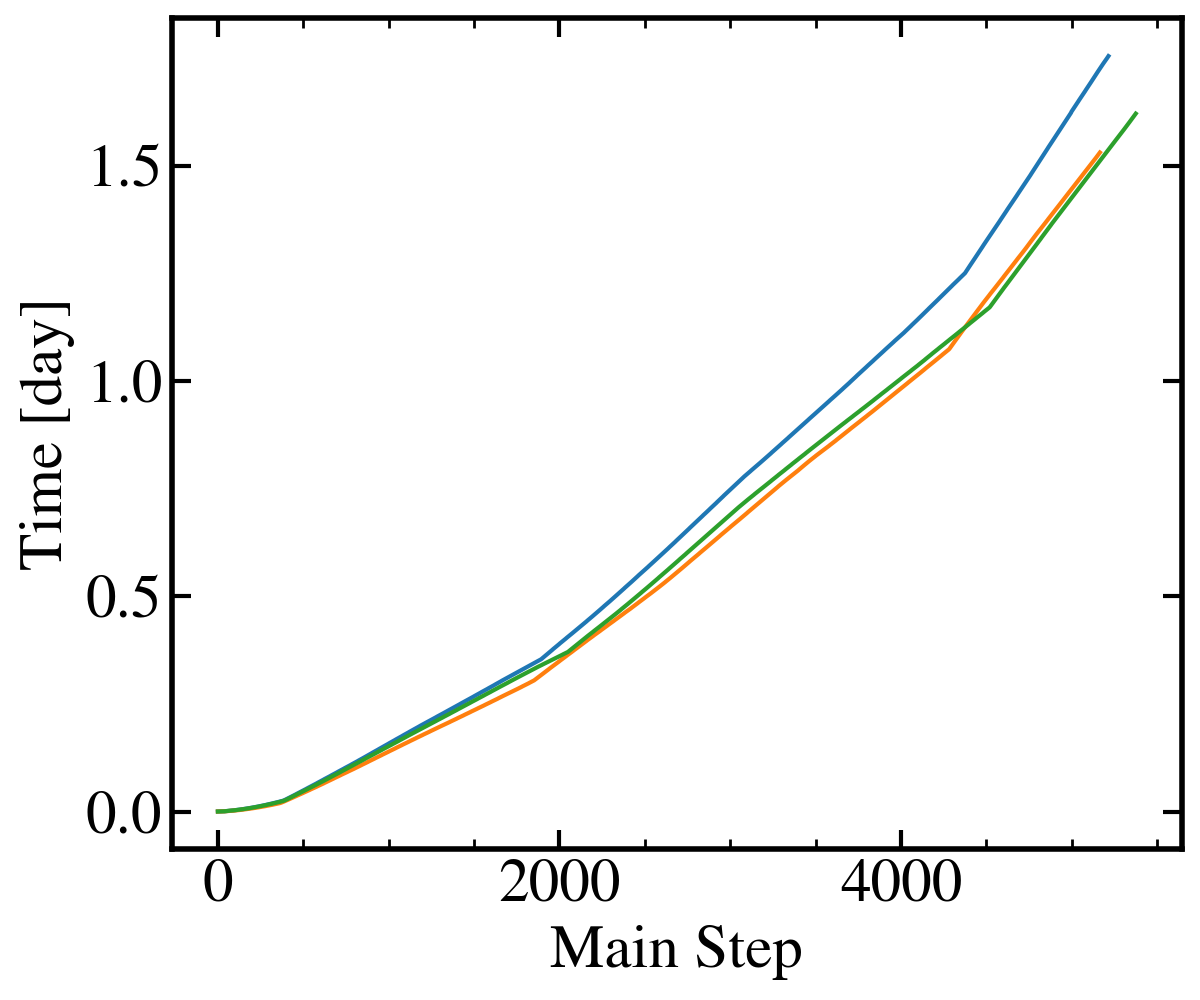

In [85]:
plt.figure(figsize=(6, 5))
plt.plot(step1, time1/3600/24)
plt.plot(step2, time2/3600/24)
plt.plot(step3, time3/3600/24)

plt.xlabel("Main Step")
plt.ylabel("Time [day]")
plt.tight_layout(pad=0.3)

<IPython.core.display.Javascript object>


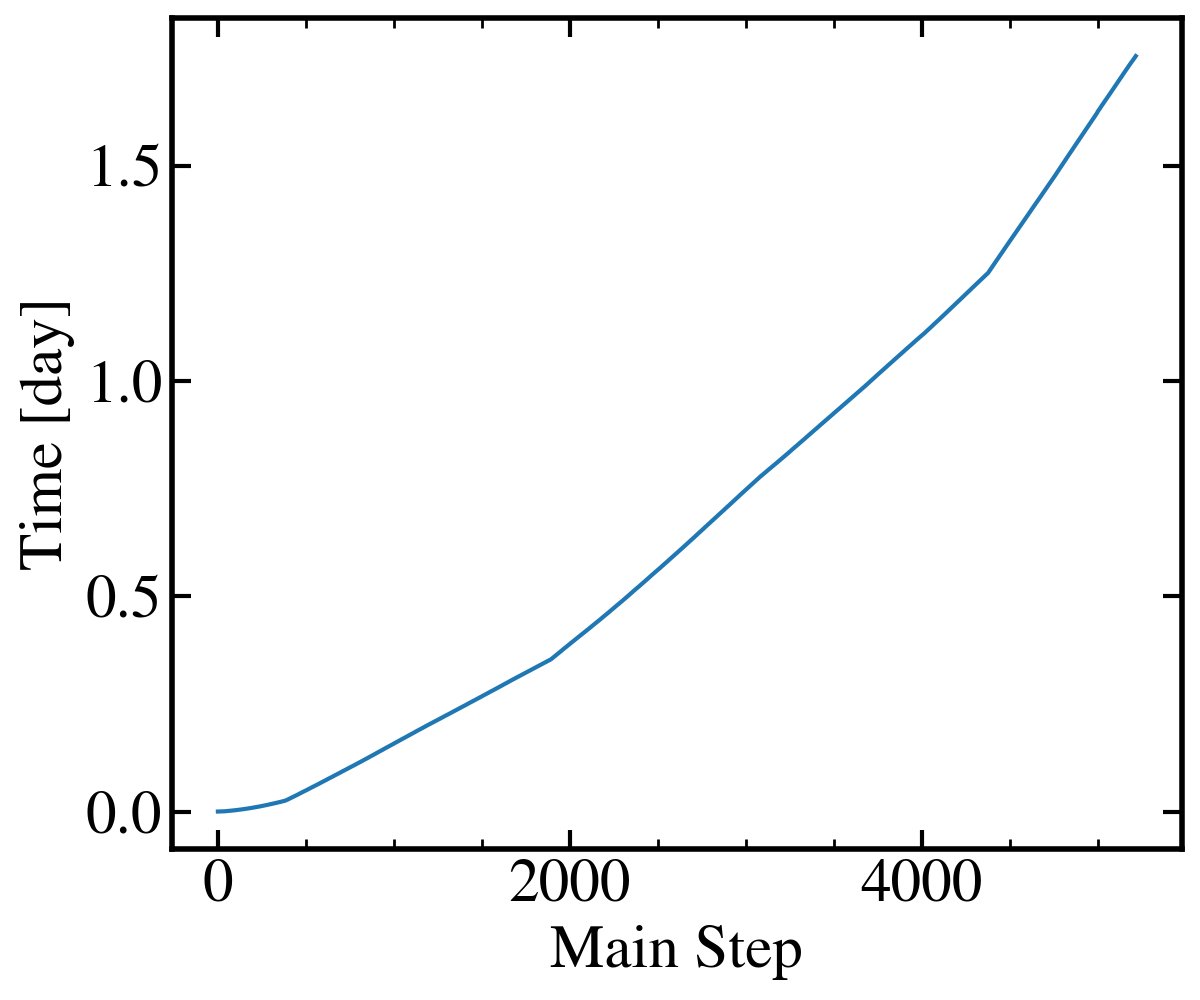

In [89]:
plt.figure(figsize=(6, 5))
plt.plot(step1, time1/3600/24)
# plt.plot(lcdm_step1, lcdm_time1/3600/24)

plt.xlabel("Main Step")
plt.ylabel("Time [day]")
plt.tight_layout(pad=0.3)